<a href="https://colab.research.google.com/github/CGproject-record/survival_anaysis_try/blob/main/20230914_survival_analysis_in_random_forest_and_tree_gradient_boosting_and_extra_tree_with_evaluation%20colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pip install scikit-survival

In [ ]:
# Random forest

In [ ]:
import matplotlib.pyplot as plt
from sksurv.datasets import load_whas500
from sksurv.ensemble import RandomSurvivalForest

In [ ]:
X, y = load_whas500()
X = X.astype(float)

In [ ]:
X

,afb,age,av3,bmi,chf,cvd,diasbp,gender,hr,los,miord,mitype,sho,sysbp
0,1.0,83.0,0.0,25.54051,0.0,1.0,78.0,0.0,89.0,5.0,1.0,0.0,0.0,152.0
1,0.0,49.0,0.0,24.02398,0.0,1.0,60.0,0.0,84.0,5.0,0.0,1.0,0.0,120.0
2,0.0,70.0,0.0,22.14290,0.0,0.0,88.0,1.0,83.0,5.0,0.0,1.0,0.0,147.0
3,0.0,70.0,0.0,26.63187,1.0,1.0,76.0,0.0,65.0,10.0,0.0,1.0,0.0,123.0
4,0.0,70.0,0.0,24.41255,0.0,1.0,85.0,0.0,63.0,6.0,0.0,1.0,0.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.0,76.0,0.0,27.96454,0.0,1.0,88.0,1.0,68.0,1.0,0.0,1.0,0.0,112.0
496,0.0,76.0,0.0,24.26862,0.0,1.0,96.0,1.0,88.0,3.0,0.0,0.0,0.0,208.0
497,1.0,57.0,0.0,42.13576,0.0,1.0,74.0,1.0,123.0,3.0,0.0,0.0,0.0,120.0
498,0.0,67.0,0.0,27.40905,0.0,1.0,62.0,0.0,59.0,1.0,0.0,1.0,0.0,112.0


In [ ]:
rf_estimator = RandomSurvivalForest().fit(X, y)

In [ ]:
X.iloc[:5]

,afb,age,av3,bmi,chf,cvd,diasbp,gender,hr,los,miord,mitype,sho,sysbp
0,1.0,83.0,0.0,25.54051,0.0,1.0,78.0,0.0,89.0,5.0,1.0,0.0,0.0,152.0
1,0.0,49.0,0.0,24.02398,0.0,1.0,60.0,0.0,84.0,5.0,0.0,1.0,0.0,120.0
2,0.0,70.0,0.0,22.14290,0.0,0.0,88.0,1.0,83.0,5.0,0.0,1.0,0.0,147.0
3,0.0,70.0,0.0,26.63187,1.0,1.0,76.0,0.0,65.0,10.0,0.0,1.0,0.0,123.0
4,0.0,70.0,0.0,24.41255,0.0,1.0,85.0,0.0,63.0,6.0,0.0,1.0,0.0,135.0


In [ ]:
chf_funcs = rf_estimator.predict_cumulative_hazard_function(X.iloc[:5])

In [ ]:
chf_funcs.shape

(5,)

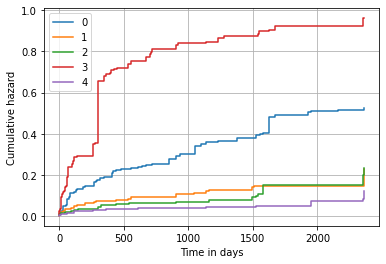

In [ ]:
surv = rf_estimator.predict_cumulative_hazard_function(X.iloc[:5], return_array=True)

for i, s in enumerate(surv):
    plt.step(rf_estimator.unique_times_, s, where="post", label=str(i))
plt.ylabel("Cumulative hazard")
plt.xlabel("Time in days")
plt.legend()
plt.grid(True)

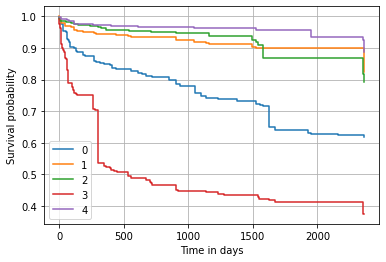

In [ ]:
surv = rf_estimator.predict_survival_function(X.iloc[:5], return_array=True)

for i, s in enumerate(surv):
    plt.step(rf_estimator.unique_times_, s, where="post", label=str(i))
plt.ylabel("Survival probability")
plt.xlabel("Time in days")
plt.legend()
plt.grid(True)

In [ ]:
#  concordance index
rf_estimator.score(X, y)

0.9002248865587034

In [ ]:
# Tree
import matplotlib.pyplot as plt
from sksurv.datasets import load_whas500
from sksurv.tree import SurvivalTree

In [ ]:
X, y = load_whas500()
X = X.astype(float)

In [ ]:
y.shape

(500,)

In [ ]:
tree_estimator = SurvivalTree().fit(X, y)

In [ ]:
chf_funcs = tree_estimator.predict_cumulative_hazard_function(X.iloc[:5])

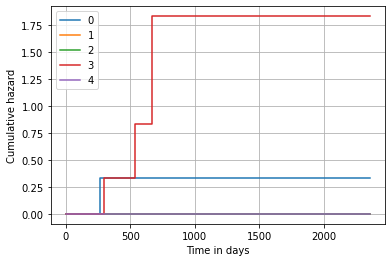

In [ ]:
surv = tree_estimator.predict_cumulative_hazard_function(X.iloc[:5], return_array=True)

for i, s in enumerate(surv):
    plt.step(tree_estimator.unique_times_, s, where="post", label=str(i))
plt.ylabel("Cumulative hazard")
plt.xlabel("Time in days")
plt.legend()
plt.grid(True)

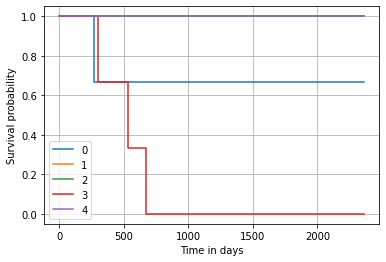

In [ ]:
surv = tree_estimator.predict_survival_function(X.iloc[:5], return_array=True)

for i, s in enumerate(surv):
    plt.step(tree_estimator.unique_times_, s, where="post", label=str(i))
plt.ylabel("Survival probability")
plt.xlabel("Time in days")
plt.legend()
plt.grid(True)

In [ ]:
#  concordance index
tree_estimator.score(X, y)

0.9056940212111938

In [ ]:
import matplotlib.pyplot as plt
from sksurv.datasets import load_whas500
from sksurv.ensemble import ExtraSurvivalTrees

In [ ]:
X, y = load_whas500()
X = X.astype(float)

In [ ]:
et_estimator = ExtraSurvivalTrees().fit(X, y)

In [ ]:
surv_funcs = et_estimator.predict_cumulative_hazard_function(X.iloc[:5])

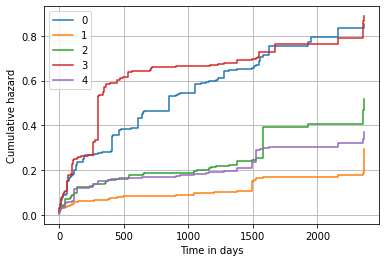

In [ ]:
surv = et_estimator.predict_cumulative_hazard_function(X.iloc[:5], return_array=True)

for i, s in enumerate(surv):
    plt.step(et_estimator.unique_times_, s, where="post", label=str(i))
plt.ylabel("Cumulative hazard")
plt.xlabel("Time in days")
plt.legend()
plt.grid(True)

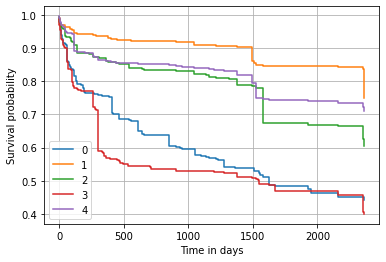

In [ ]:
surv = et_estimator.predict_survival_function(X.iloc[:5], return_array=True)

for i, s in enumerate(surv):
    plt.step(et_estimator.unique_times_, s, where="post", label=str(i))
plt.ylabel("Survival probability")
plt.xlabel("Time in days")
plt.legend()
plt.grid(True)

In [ ]:
#  concordance index
et_estimator.score(X, y)

0.8349678638438303

In [ ]:
import matplotlib.pyplot as plt
from sksurv.datasets import load_whas500
from sksurv.ensemble import GradientBoostingSurvivalAnalysis

In [ ]:
X, y = load_whas500()
X = X.astype(float)

In [ ]:
gb_estimator = GradientBoostingSurvivalAnalysis(loss="coxph").fit(X, y)

In [ ]:
chf_funcs = gb_estimator.predict_cumulative_hazard_function(X.iloc[:5])

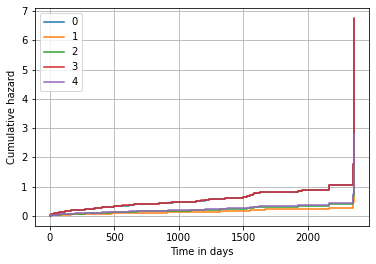

In [ ]:
surv = gb_estimator.predict_cumulative_hazard_function(X.iloc[:5], return_array=True)

for i, s in enumerate(surv):
    plt.step(gb_estimator.unique_times_, s, where="post", label=str(i))
plt.ylabel("Cumulative hazard")
plt.xlabel("Time in days")
plt.legend()
plt.grid(True)

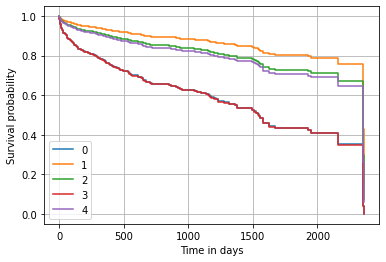

In [ ]:
surv = gb_estimator.predict_survival_function(X.iloc[:5], return_array=True)

for i, s in enumerate(surv):
    plt.step(gb_estimator.unique_times_, s, where="post", label=str(i))
plt.ylabel("Survival probability")
plt.xlabel("Time in days")
plt.legend()
plt.grid(True)

In [ ]:
#  concordance index
gb_estimator.score(X, y)

0.8642563440631279